# Predicting Car Purchase Decision with Classification

In this notebook, I will be predicting whether the customer would purchase the car or not based on provided features.

The following dataset is from Kaggle: https://www.kaggle.com/datasets/gabrielsantello/cars-purchase-decision-dataset

## Import Libraries and Load Dataset

In [30]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import *
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

# load dataset
df = pd.read_csv('car_data.csv')

## Exploratory Data Analysis

In [31]:
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [32]:
# what are the variables of the dataset?
print('Column Information:')
for cols in df.columns:
    if cols != 'Purchased':
        print('column name: {}'.format(str(cols)))
    else:
        print('column name: {} (no = 0, yes = 1)'.format(str(cols)))

Column Information:
column name: User ID
column name: Gender
column name: Age
column name: AnnualSalary
column name: Purchased (no = 0, yes = 1)


In [33]:
# what are some general information about the dataset?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [34]:
# what are statistical information about numerical variables in the dataset?
df.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


### Observations
1. There are no missing values in the dataset
2. **User ID** column does not seem to help the model
3. **Age** and **AnnualSalary** columns' mean and median values are similiar, so distribution may be normal.
4. **AnnualSalary** column needs feature scaling.
5. **Gender** column needs to be changed into binary features.

### drop insignificant variables

In [35]:
# drop User ID column
df.drop(columns=['User ID'], inplace=True)
df.head()

,Gender,Age,AnnualSalary,Purchased
0,Male,35,20000,0
1,Male,40,43500,0
2,Male,49,74000,0
3,Male,40,107500,1
4,Male,25,79000,0


### Data Visualization

Text(0.5, 1.0, 'Purchased')

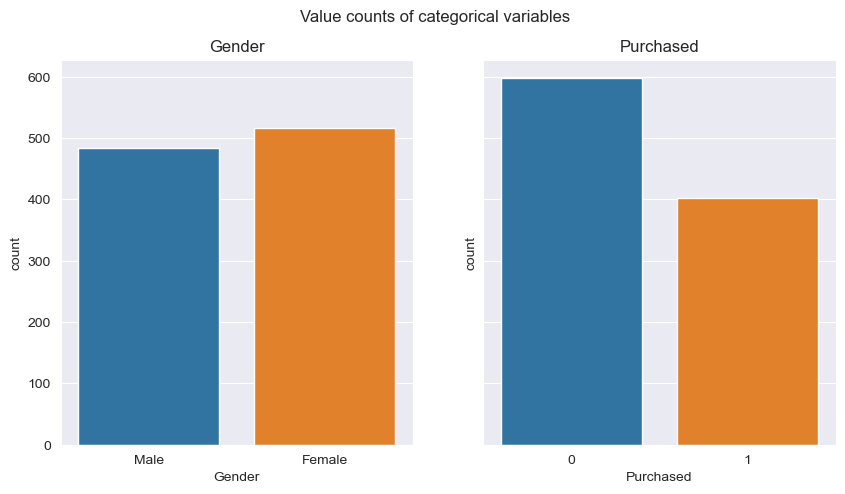

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(10,5), sharey=True)
fig.suptitle('Value counts of categorical variables')

sns.countplot(ax=axes[0], data=df, x = 'Gender')
sns.countplot(ax=axes[1], data=df, x = 'Purchased')
axes[0].set_title('Gender')
axes[1].set_title('Purchased')

<AxesSubplot: xlabel='Purchased', ylabel='count'>

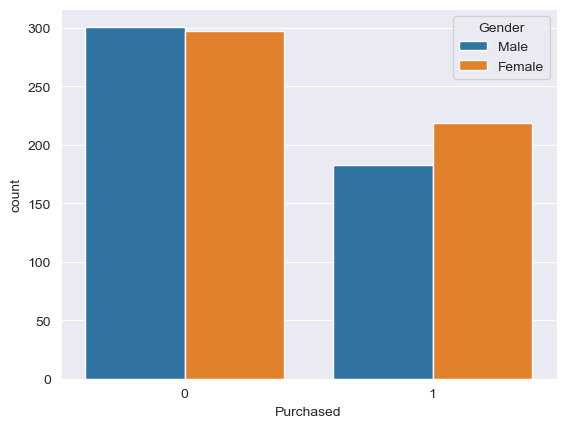

In [37]:
sns.countplot(data=df, x='Purchased', hue='Gender')

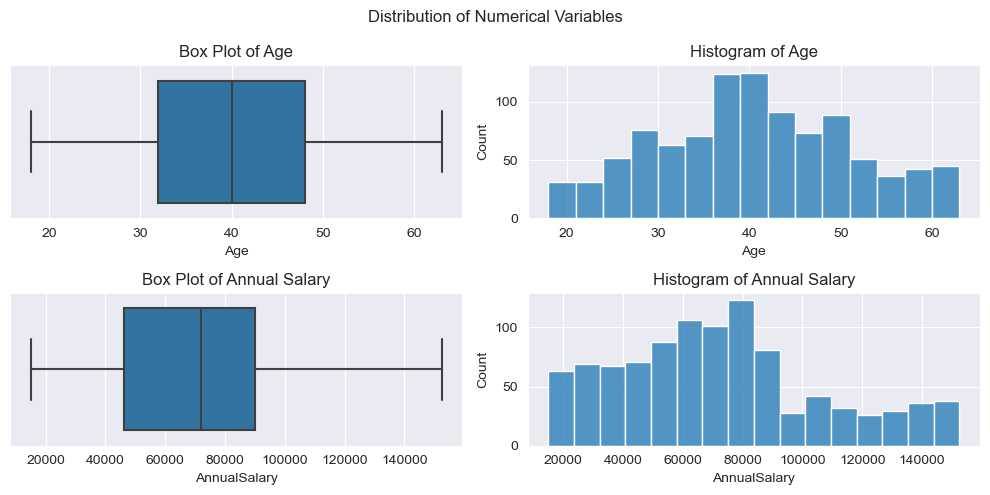

In [38]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10, 5))
fig.suptitle('Distribution of Numerical Variables')
ax[0, 0].set_title('Box Plot of Age')
ax[0, 1].set_title('Histogram of Age')
ax[1, 0].set_title('Box Plot of Annual Salary')
ax[1, 1].set_title('Histogram of Annual Salary')

sns.boxplot(data=df, x='Age', ax=ax[0, 0])
sns.boxplot(data=df, x='AnnualSalary', ax=ax[1, 0])
sns.histplot(data=df, x='Age', ax=ax[0, 1])
sns.histplot(data=df, x='AnnualSalary', ax=ax[1, 1])
fig.tight_layout()

<AxesSubplot: xlabel='Age', ylabel='AnnualSalary'>

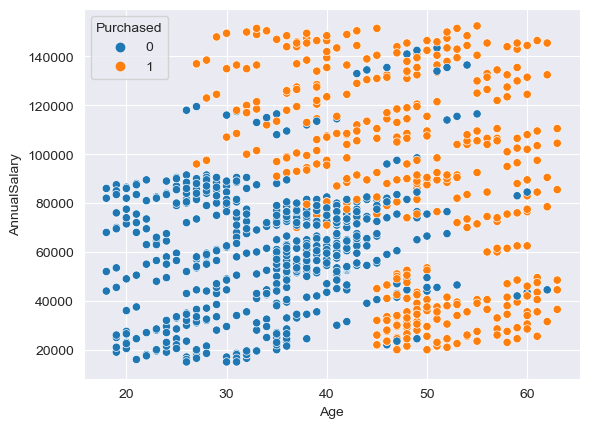

In [39]:
sns.scatterplot(data = df, x = 'Age', y = 'AnnualSalary', hue = 'Purchased')

#### Observation
1. More female customers purchased the car
2. Age has approximate Normal distribution
3. Annual Salary is slightly skewed
4. Older and greater the annual salary is for a customer, there is high chance of purchasing the car.

## Data Preprocessing

### create dummy variables

In [40]:
df_gender_dummies = pd.get_dummies(df["Gender"])

df_combined = pd.concat((df_gender_dummies, df), axis=1)
df_combined = df_combined.drop(["Gender"], axis=1)
df_combined = df_combined.drop(["Male"], axis=1)
df_combined = df_combined.rename(columns={"Female": "Gender"})
df_combined.head()

,Gender,Age,AnnualSalary,Purchased
0,0,35,20000,0
1,0,40,43500,0
2,0,49,74000,0
3,0,40,107500,1
4,0,25,79000,0


### set independent and dependent variables

In [41]:
x = df_combined.iloc[:, :-1]
y = df_combined.iloc[:, -1]

### split dataset into train and test set

In [42]:
x = x.values
y = y.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### feature scaling on numerical variables

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Model Building

### logistic regression

In [44]:
# create classifiers
classifier_lr_scaled = LogisticRegression().fit(x_train_scaled, y_train)
classifier_lr_not_scaled = LogisticRegression().fit(x_train, y_train)

# make predictions
y_pred_lr_scaled = classifier_lr_scaled.predict(x_test_scaled)
y_pred_lr_not_scaled = classifier_lr_not_scaled.predict(x_test)

# create confusion matrices
cm_lr_scaled = confusion_matrix(y_test, y_pred_lr_scaled)
cm_lr_not_scaled = confusion_matrix(y_test, y_pred_lr_not_scaled)

### K-Nearest Neighbor classification

In [45]:
# create classifiers
classifier_knn_scaled = KNeighborsClassifier(metric='minkowski', n_neighbors=5, p=2).fit(x_train_scaled, y_train)
classifier_knn_not_scaled = KNeighborsClassifier(metric='minkowski', n_neighbors=5, p=2).fit(x_train, y_train)

# make predictions
y_pred_knn_scaled = classifier_knn_scaled.predict(x_test_scaled)
y_pred_knn_not_scaled = classifier_knn_not_scaled.predict(x_test)

# create confusion matricies
cm_knn_scaled = confusion_matrix(y_test, y_pred_knn_scaled)
cm_knn_not_scaled = confusion_matrix(y_test, y_pred_knn_not_scaled)


### support vector machine

In [46]:
# create classifiers
classifier_svc_scaled = SVC().fit(x_train_scaled, y_train)
classifier_svc_not_scaled = SVC().fit(x_train, y_train)

# make predictions
y_pred_svc_scaled = classifier_svc_scaled.predict(x_test_scaled)
y_pred_svc_not_scaled = classifier_svc_not_scaled.predict(x_test)

# create confusion matricies
cm_svc_scaled = confusion_matrix(y_test, y_pred_svc_scaled)
cm_svc_not_scaled = confusion_matrix(y_test, y_pred_svc_not_scaled)

### decision tree classification

In [47]:
# create classifiers
classifier_dtc_scaled = DecisionTreeClassifier().fit(x_train_scaled, y_train)
classifier_dtc_not_scaled = DecisionTreeClassifier().fit(x_train, y_train)

# make predictions
y_pred_dtc_scaled = classifier_dtc_scaled.predict(x_test_scaled)
y_pred_dtc_not_scaled = classifier_dtc_not_scaled.predict(x_test)

# create confusion matrices
cm_dtc_scaled = confusion_matrix(y_test, y_pred_dtc_scaled)
cm_dtc_not_scaled = confusion_matrix(y_test, y_pred_dtc_not_scaled)

### random forest classification

In [48]:
# create classifiers
classifier_rfc_scaled = RandomForestClassifier().fit(x_train_scaled, y_train)
classifier_rfc_not_scaled = RandomForestClassifier().fit(x_train, y_train)

# make predictions
y_pred_rfc_scaled = classifier_rfc_scaled.predict(x_test_scaled)
y_pred_rfc_not_scaled = classifier_rfc_not_scaled.predict(x_test)

# create confusion matrices
cm_rfc_scaled = confusion_matrix(y_test, y_pred_rfc_scaled)
cm_rfc_not_scaled = confusion_matrix(y_test, y_pred_rfc_not_scaled)

## Visualization

### logistic regression

Classification report for scaled logistic regression

              precision    recall  f1-score   support

           0       0.76      0.93      0.84       112
           1       0.87      0.62      0.73        88

    accuracy                           0.80       200
   macro avg       0.82      0.78      0.78       200
weighted avg       0.81      0.80      0.79       200


Classification report for non-scaled logistic regression

              precision    recall  f1-score   support

           0       0.56      1.00      0.72       112
           1       0.00      0.00      0.00        88

    accuracy                           0.56       200
   macro avg       0.28      0.50      0.36       200
weighted avg       0.31      0.56      0.40       200



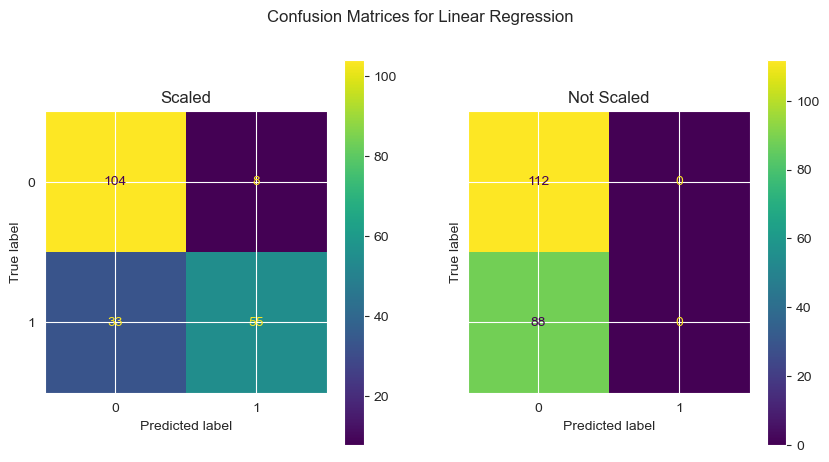

In [49]:
fig_1 = ConfusionMatrixDisplay(confusion_matrix=cm_lr_scaled)
fig_2 = ConfusionMatrixDisplay(confusion_matrix=cm_lr_not_scaled)

fig, axes = plt.subplots(1, 2, figsize=(10,5), sharey=True)
fig.suptitle('Confusion Matrices for Linear Regression')

fig_1.plot(ax=axes[0])
fig_2.plot(ax=axes[1])

axes[0].set_title('Scaled')
axes[1].set_title('Not Scaled')

print("Classification report for scaled logistic regression\n\n{}\n\nClassification report for non-scaled logistic regression\n\n{}".format(
    classification_report(y_test,y_pred_lr_scaled),
    classification_report(y_test,y_pred_lr_not_scaled))
)

### K-Nearest neighbor classification

Classification report for scaled scaled knn

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       112
           1       0.91      0.91      0.91        88

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200


Classification report for non-scaled knn

              precision    recall  f1-score   support

           0       0.77      0.91      0.84       112
           1       0.85      0.66      0.74        88

    accuracy                           0.80       200
   macro avg       0.81      0.78      0.79       200
weighted avg       0.81      0.80      0.80       200



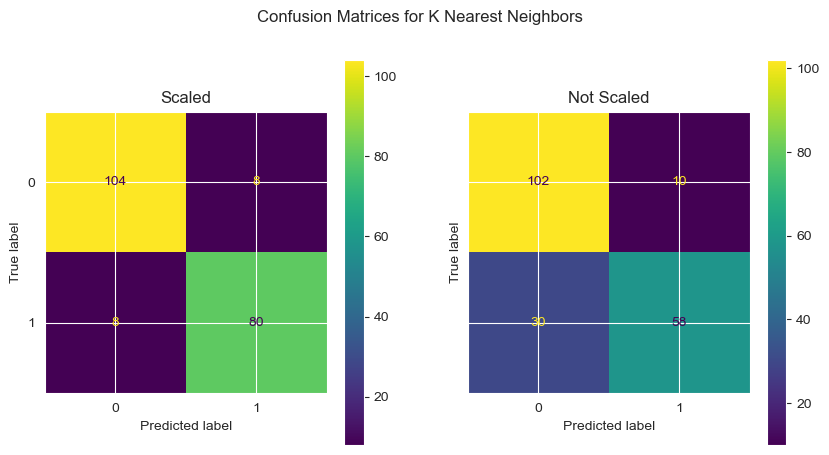

In [52]:
fig_1 = ConfusionMatrixDisplay(confusion_matrix=cm_knn_scaled)
fig_2 = ConfusionMatrixDisplay(confusion_matrix=cm_knn_not_scaled)

fig, axes = plt.subplots(1, 2, figsize=(10,5), sharey=True)
fig.suptitle('Confusion Matrices for K Nearest Neighbors')

fig_1.plot(ax=axes[0])
fig_2.plot(ax=axes[1])

axes[0].set_title('Scaled')
axes[1].set_title('Not Scaled')

print("Classification report for scaled scaled knn\n\n{}\n\nClassification report for non-scaled knn\n\n{}".format(
    classification_report(y_test,y_pred_knn_scaled),
    classification_report(y_test,y_pred_knn_not_scaled))
)

### support vector machine

Classification report for scaled scaled support vector machine

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       112
           1       0.92      0.89      0.90        88

    accuracy                           0.92       200
   macro avg       0.92      0.91      0.91       200
weighted avg       0.92      0.92      0.91       200


Classification report for non-scaled support vector machine

              precision    recall  f1-score   support

           0       0.67      0.96      0.79       112
           1       0.90      0.40      0.55        88

    accuracy                           0.71       200
   macro avg       0.78      0.68      0.67       200
weighted avg       0.77      0.71      0.69       200



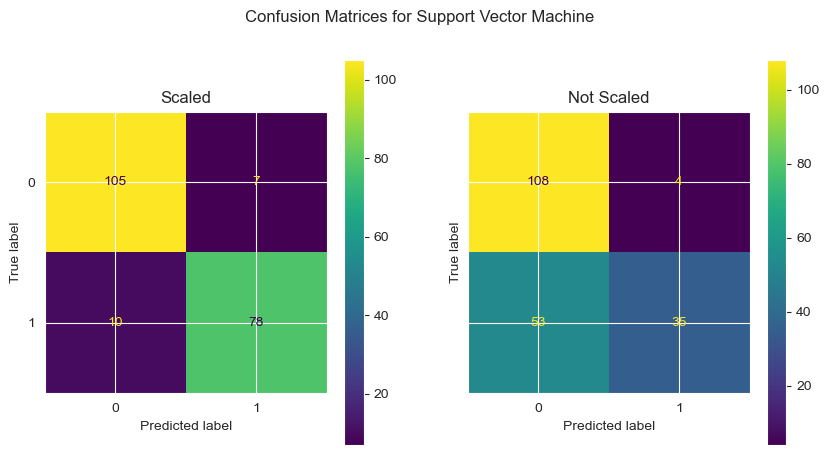

In [51]:
fig_1 = ConfusionMatrixDisplay(confusion_matrix=cm_svc_scaled)
fig_2 = ConfusionMatrixDisplay(confusion_matrix=cm_svc_not_scaled)

fig, axes = plt.subplots(1, 2, figsize=(10,5), sharey=True)
fig.suptitle('Confusion Matrices for Support Vector Machine')

fig_1.plot(ax=axes[0])
fig_2.plot(ax=axes[1])

axes[0].set_title('Scaled')
axes[1].set_title('Not Scaled')

print("Classification report for scaled scaled support vector machine\n\n{}\n\nClassification report for non-scaled support vector machine\n\n{}".format(
    classification_report(y_test,y_pred_svc_scaled),
    classification_report(y_test,y_pred_svc_not_scaled))
)

### decision tree classification

Classification report for scaled decision tree classification

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       112
           1       0.89      0.86      0.88        88

    accuracy                           0.90       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.90      0.89       200


Classification report for non-scaled decision tree classification

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       112
           1       0.90      0.86      0.88        88

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



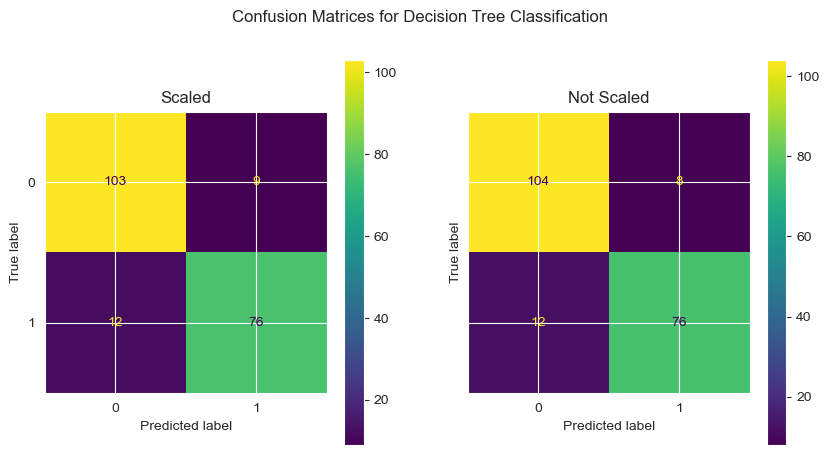

In [53]:
fig_1 = ConfusionMatrixDisplay(confusion_matrix=cm_dtc_scaled)
fig_2 = ConfusionMatrixDisplay(confusion_matrix=cm_dtc_not_scaled)

fig, axes = plt.subplots(1, 2, figsize=(10,5), sharey=True)
fig.suptitle('Confusion Matrices for Decision Tree Classification')

fig_1.plot(ax=axes[0])
fig_2.plot(ax=axes[1])

axes[0].set_title('Scaled')
axes[1].set_title('Not Scaled')

print("Classification report for scaled decision tree classification\n\n{}\n\nClassification report for non-scaled decision tree classification\n\n{}".format(
    classification_report(y_test,y_pred_dtc_scaled),
    classification_report(y_test,y_pred_dtc_not_scaled))
)

### random forest classification

Classification report for scaled scaled support vector machine

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       112
           1       0.92      0.89      0.90        88

    accuracy                           0.92       200
   macro avg       0.92      0.91      0.91       200
weighted avg       0.92      0.92      0.91       200


Classification report for non-scaled support vector machine

              precision    recall  f1-score   support

           0       0.67      0.96      0.79       112
           1       0.90      0.40      0.55        88

    accuracy                           0.71       200
   macro avg       0.78      0.68      0.67       200
weighted avg       0.77      0.71      0.69       200



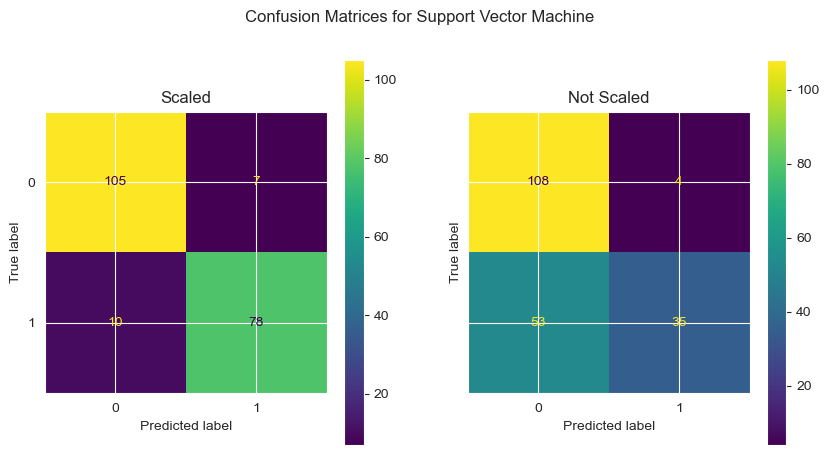

In [54]:
fig_1 = ConfusionMatrixDisplay(confusion_matrix=cm_svc_scaled)
fig_2 = ConfusionMatrixDisplay(confusion_matrix=cm_svc_not_scaled)

fig, axes = plt.subplots(1, 2, figsize=(10,5), sharey=True)
fig.suptitle('Confusion Matrices for Support Vector Machine')

fig_1.plot(ax=axes[0])
fig_2.plot(ax=axes[1])

axes[0].set_title('Scaled')
axes[1].set_title('Not Scaled')

print("Classification report for scaled scaled support vector machine\n\n{}\n\nClassification report for non-scaled support vector machine\n\n{}".format(
    classification_report(y_test,y_pred_svc_scaled),
    classification_report(y_test,y_pred_svc_not_scaled))
)

## Validation

In [55]:
models = [classifier_lr_scaled, classifier_dtc_scaled, classifier_rfc_scaled, classifier_svc_scaled, classifier_knn_scaled]
scores = []
for model in models:
    scores.append(round(stats.mean(cross_val_score(model, x_test_scaled, y_test, cv=20))*100, 2))
for i in range(len(scores)):
    print('{}% accuracy for {} model'.format(scores[i], str(models[i])[:-2]))

84.0% accuracy for LogisticRegression model
81.5% accuracy for DecisionTreeClassifier model
90.5% accuracy for RandomForestClassifier model
89.5% accuracy for SVC model
88.5% accuracy for KNeighborsClassifier model


## Conclusion

Random Forest Classification and Decision Tree Classification have similiar accuracies regardless of feature scaling.

Linear Regression has the lowest accuracy among the three models.

**Follow-up questions:**

- How can I increase accuracy to >90%? Is it possible?
- Why do RFC and DTC do not need feature scaling?
- What other models should I use?